<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Workbook - Week 4

Now we have a random number generator we can sample from the available probility distributions. The most common used in finance would be:
- `normal` the normal distribution $x\sim N(\mu,\sigma^2)$ with mean $\mu$ and variance $\sigma^2$
- `uniform` the uniform distribution $x\sim U(a,b)$ over the interval $[a,b]$ can be used to calculate if an event happens according to some known probability
- `exponential` the exponential distribution $x\sim$ Exp $(\lambda)$ with rate parameter $\lambda$ to generate the waiting time of a Poisson process with mean $\lambda$

# Tasks

1. Generate 1000 numbers from each of the distributions, and plot out a histogram of the frequency distribution

In [1]:
import numpy as np

# First, conjure a generator
prng = np.random.default_rng(8675309)

# Define a function that draws the three desired samples
def threeSamples( n ):
    # Our result will be a dictionary
    result = {
        "normal": prng.normal(loc=0.0, scale=1.0, size=n), # the standard normal
        "uniform": prng.uniform(low=0.0, high=1.0, size=n), # uniform over the unit interval
        "exponential": prng.exponential(scale=1.0, size=n) # lambda = 1.0 / scale
    }
    
    return( result )

# Do a small test
threeSamples( 3 )


{'normal': array([-0.03940941,  0.70927967, -0.00996881]),
 'uniform': array([0.90673291, 0.15120157, 0.33594527]),
 'exponential': array([1.56888215, 0.18694061, 0.71216615])}

Now plot histograms

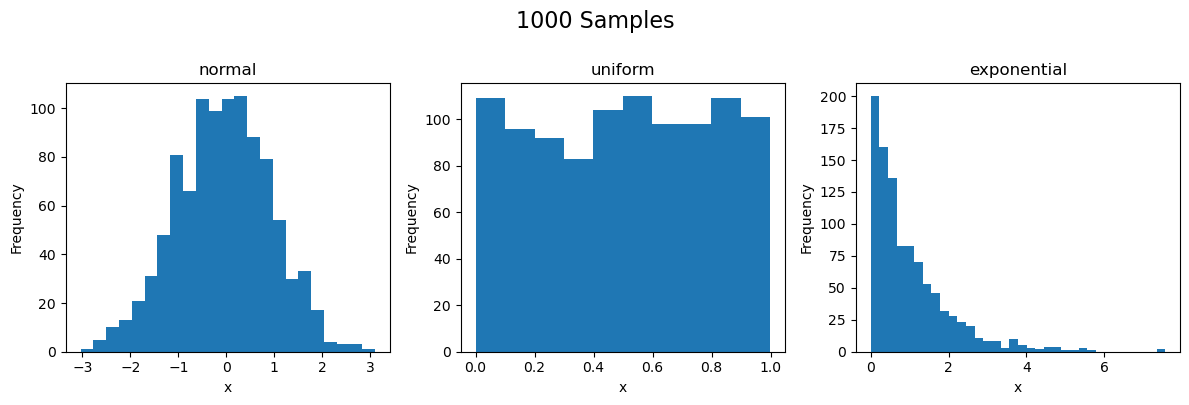

In [2]:
import matplotlib.pyplot as plt

# Define a function to make the plot
def plotThreeHistorgrams( n ):
    # Draw the samples
    sampleDict = threeSamples( n )
    
    # Set the dimensions of the plot
    heightInInches = 4
    widthInInches = 12
    myFig, myAxes = plt.subplots(1,3, figsize=[widthInInches,heightInInches])
  
    # Add a big, overall title with the sample size
    myFig.suptitle('{} Samples'.format(n), y= 1.0, fontsize=16)

    # Draw the histograms
    axNum = 0
    for distrib in sampleDict.keys():
        myAxes[axNum].hist( sampleDict[distrib], bins='fd' )
        myAxes[axNum].set_xlabel('x')
        myAxes[axNum].set_ylabel('Frequency')
        myAxes[axNum].set_title(distrib)
        axNum += 1

    myFig.tight_layout()
    plt.savefig('Figures/ThreeHistograms_{}.pdf'.format(n), format='pdf', bbox_inches='tight')
    
# Do the do
plotThreeHistorgrams( 1000  )

2. Regenerate the graphs with $n=10,000$ $n=100,000$ $n=1,000,000$ numbers from the distribution, what do you notice happens?


As one would expect, the histograms get smoother as the sample size increases.

[None, None, None]

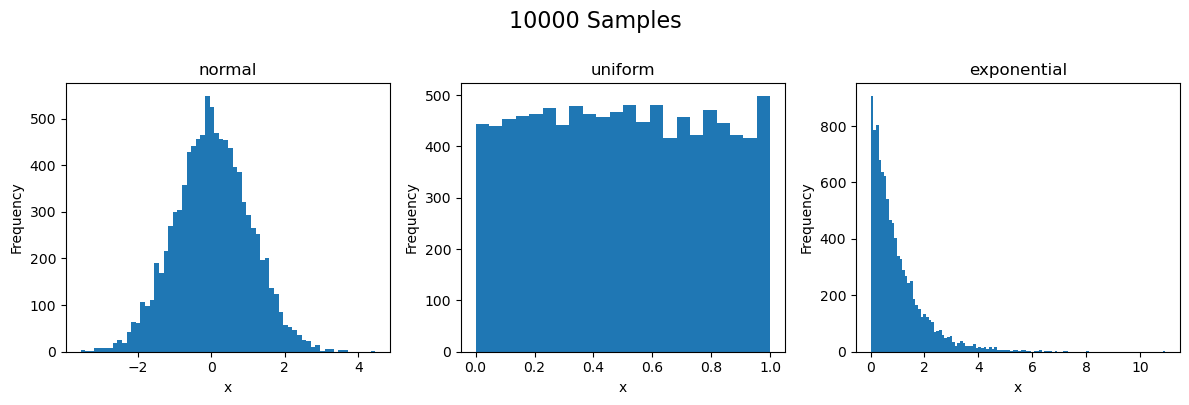

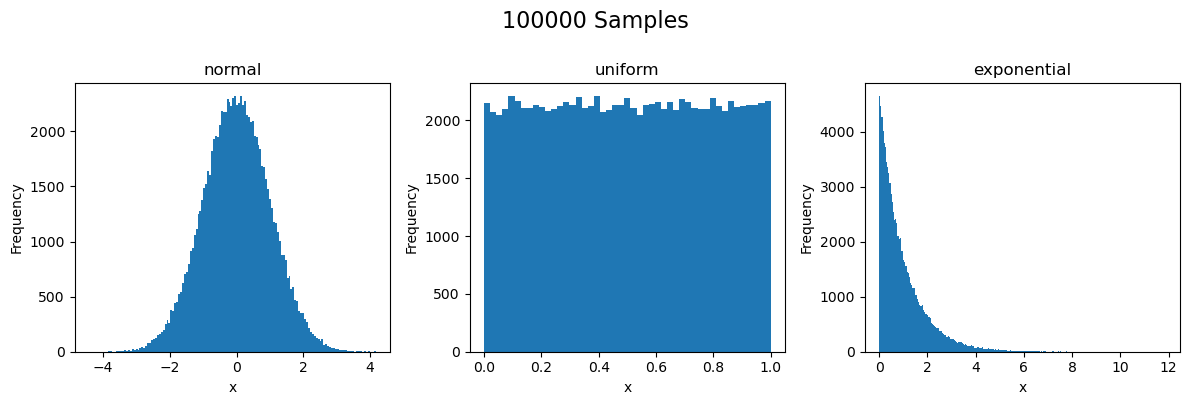

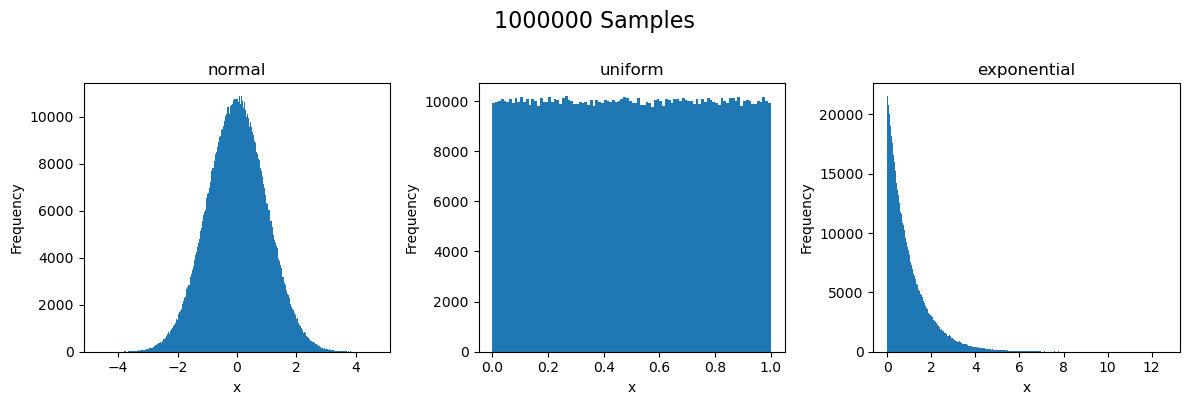

In [3]:
[plotThreeHistorgrams(int(pow(10,j))) for j in (4, 5, 6)]

Assume $x \sim N(0,1)$ is a random draw from the normal distribution, the random variable $F=f(x)$, and the function $f(x)$ is given by
$$
f(x) = \begin{cases}
x^2 & \text{ if } x \leq 1 \\
0 & \text{ if } x > 1
\end{cases}.
$$

3. Use Monte Carlo simulations, can you calculate the expectation $V=\text{E}[F]$?

In [4]:
def f( x ):
    if x <= 1.0:
        return( x*x )
    else:
        return( 0.0 )
    
def mcExpectation( nReps, sampleSize, f, rng ):
    result = np.zeros( nReps )
    for j in range(nReps):
        xVals = rng.normal( loc=0.0, scale=1.0, size=sampleSize )
        fVals = [f(x) for x in xVals]
        result[j] = np.mean(fVals)
        
    return result

# Assemble results for a range of sample sizes
nSizes = 10 
repsPerSize=20
sampleSize = [10*int(pow(2,j+1)) for j in range(nSizes)]
results = np.zeros((nSizes, repsPerSize))
for j in range(nSizes):
    results[j,] = mcExpectation( repsPerSize, sampleSize[j], f, prng )
    
results[0:5,0:5]

array([[1.18357205, 0.53426316, 0.83820986, 0.39045976, 0.54254973],
       [0.56063404, 0.57832016, 0.80823431, 0.61984734, 0.63679551],
       [0.75253625, 0.51674848, 0.71746227, 0.55412378, 0.56718731],
       [0.46452844, 0.62311079, 0.71125475, 0.68878975, 0.54592913],
       [0.59822732, 0.62790761, 0.50519851, 0.64342913, 0.66782779]])

4. Change the value of `numberOfResults` to 20, 40, 80 and more. What properties can you identify in the graphs? Be careful, as $N$ gets large so do the computation times!


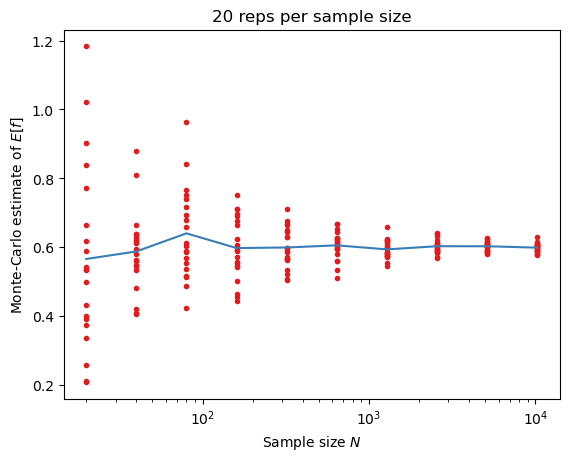

In [5]:
# Choose some pleasing colors
cmap = plt.colormaps["Set1"]
set_pal = cmap(range(0,9))

for j in range(nSizes):
    plt.semilogx( np.repeat(sampleSize[j], repsPerSize), results[j,], color=set_pal[0], marker=".", linestyle='none' )
    
# Add a line running through the means of the reps
meanResult = np.mean( results, axis=1 ) # Takes mean across rows
plt.semilogx( sampleSize, meanResult, color=set_pal[1] )
    
# Add titles
plt.xlabel( "Sample size $N$" )
plt.ylabel( "Monte-Carlo estimate of $E[f]$" )
plt.title( "{} reps per sample size".format(repsPerSize) )

plt.savefig('Figures/MonteCarloExpectation.pdf', format='pdf', bbox_inches='tight')

In [6]:
# Print out the mean results
meanResult

array([0.56522679, 0.58704049, 0.63975865, 0.59693548, 0.59859914,
       0.6048842 , 0.59306804, 0.60230768, 0.60220129, 0.59817476])

5.Calculate the value using numerical quadrature:-
$$
V = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^1 x^2 e^{-x^2/2} dx
$$
and use it to check the accuracy of your code. Do the results match?


In [8]:
from scipy.integrate import quad 
from math import pi, exp, sqrt

integrand = lambda x: x*x*exp(-0.5 * x*x)/sqrt(2.0 * pi)
quadResult = quad( integrand, -np.inf, 1.0 )
print( f"Quadrature result is {quadResult[0]} with error estimate {quadResult[1]}." )
print( f"Estimate with largest sample size is {meanResult[-1]}." )
print( f"This differs from the quadrature result by {abs(quadResult[0]- meanResult[-1])}." )

Quadrature result is 0.5993740215493997 with error estimate 2.5425627981444796e-10.
Estimate with largest sample size is 0.5981747562079548.
This differs from the quadrature result by 0.0011992653414448773.


6. How can you definitively say what the error is, given that for any value of $N$ you generate a random result every time? _Hint: think about the variance of your result._


One could take the variance of a large number of estimates and use that as an error estimate. 

In [9]:
np.std( results, axis=1 ) # Computes std. deviations of rows

array([0.26049573, 0.1144555 , 0.12799925, 0.08942593, 0.05748409,
       0.04032302, 0.02607088, 0.01934477, 0.01272106, 0.0126936 ])

One could also look to see whether the results appear to be normally distributed, as we'd expect on central-limit grounds.

In [23]:
# Generate lots of results for a fixed, largish sample size
nReps = 50000
samplesPerEstimate = 1000
estimates = mcExpectation( nReps, samplesPerEstimate, f,  prng )

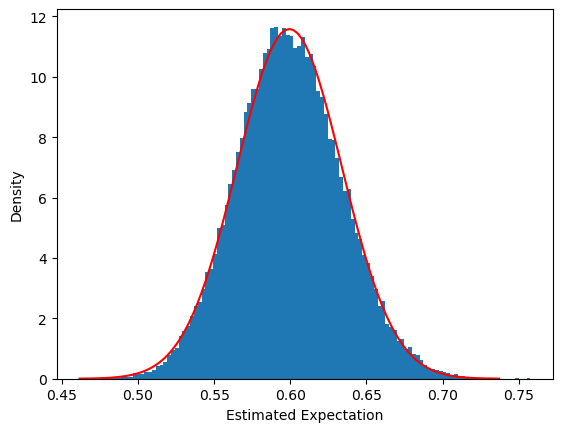

In [24]:
# Plot a histogram
plt.hist( estimates, bins='fd', density=True )
plt.xlabel( 'Estimated Expectation' )
plt.ylabel( 'Density' )

# Sketch a normal density function on top
from scipy.stats import norm

myMean = np.mean( estimates )
mySd = np.std( estimates )
xVals = np.linspace( start=(myMean - 4*mySd), stop=(myMean + 4*mySd), num=101)
densityVals = norm.pdf( xVals, loc=myMean, scale=mySd )

plt.plot( xVals, densityVals, c="red" )

7. How efficient is your code? Test different random number generators to see which one is best. For the more confident student, you might also investigate ways to speed up the calculations using the `numba` or `cython` libraries.

In [14]:
from timeit import timeit

# List the things we'll try
generatorName = ["MT19937", "PCG64", "PCG64DXSM", "Philox", "SFC64"]
nGenerators = len(generatorName)

nReps = 1000
elapsed = np.zeros( nGenerators )
for j in range(nGenerators):
    crntRng = eval( f"np.random.Generator( np.random.{generatorName[j]}(seed=8675309) )" )
    crntScript = "mcExpectation( 1, 10000, f,  crntRng )"
    elapsed[j] = timeit( crntScript, number=nReps, globals=globals() )
    print( f"{nReps} calls to mcExpectation() with a", generatorName[j], "generator took", elapsed[j], "seconds." )



1000 calls to mcExpectation() with a MT19937 generator took 1.1627700419630855 seconds.
1000 calls to mcExpectation() with a PCG64 generator took 1.1467322090175003 seconds.
1000 calls to mcExpectation() with a PCG64DXSM generator took 1.1376395418774337 seconds.
1000 calls to mcExpectation() with a Philox generator took 1.15755575010553 seconds.
1000 calls to mcExpectation() with a SFC64 generator took 1.1257389588281512 seconds.


They seem all about the same.